<a href="https://colab.research.google.com/github/smiledinisa/sk_learn/blob/master/sk_learn001_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# from sklearn import tree #导入需要的模块
# clf = tree.DecisionTreeClassifier()   #实例化
# clf = clf.fit(X_train,y_train) #用训练集数据训练模型
# result = clf.score(X_test,y_test)  #导入测试集，从接口中调用需要的信息

In [2]:
cd /content/drive/My Drive

/content/drive/My Drive


In [3]:
from sklearn import tree
import sklearn


# class sklearn.tree.DecisionTreeClassifier (criterion=’gini’, splitter=’best’, max_depth=None,
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
# random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
# class_weight=None, presort=False)

In [ ]:
# 以下就对以上的各个参数进行分析和解读。

# criterion: 标准。 不纯度： 有两个，信息熵，entropy，和基尼系数 Gini imputrity .

# 该参数就是确定不纯度的计算，找出最佳节点和最佳分支，不纯度越低，决策树对训练集的拟合越好。
# 该参数不填写默认使用gini，填写的话就两个选项。gini和 entropy。

![链接文字](https://img-blog.csdnimg.cn/20200818210331733.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)


p(i|t) 代表了t节点，i代表各个分类，p代表所占比例。分类i在节点t上所占的比例。

信息熵对不纯度更加敏感，惩罚最强。

但是实际使用中，信息熵和基尼系数其实是相当的。

信息熵的决策树生长的会更加精细，适合应用于高维数据和噪音较多的数据。

entropy很容易过拟合。



# 怎么选取：entropy 还是gini？？？
# 维度很大信息熵，噪音很大信息熵。
# 低纬度两者无区别。
# 拟合度度不够的时候选信息熵。
# 最终结论：两个都试试，哪个好，用哪个。----------------------废话。

决策树流程就是： 计算全部特征的不纯度指标-----》选取不纯度指标最优的特征来进行分支-----》在第一个特征的分支下，计算全部特征的不纯度指标-----------》选取最优----------》循环直到没有更多的特征，决策树停止生长。

In [4]:
##1. 建立一棵树。

from sklearn import tree
from sklearn.datasets import load_wine #红酒数据集。
from sklearn.model_selection import train_test_split #进行数据集的分割，成为训练集和测试集。


In [8]:
# 2.探索数据。（分析数据）
wine = load_wine()
wine.data.shape

(178, 13)

In [9]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
import pandas as pd

In [11]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis=1)



,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [12]:
wine.feature_names #酒的特征。

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target_names # 分类标签。

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [20]:
# 3. 分训练集HE TEST

Xtrain, Xtest, Ytrain,Ytest = train_test_split(wine.data,wine.target, test_size =0.3)

Xtrain.shape

(124, 13)

In [ ]:
Xtest.shape # X是数据，Y是标签，特征数为13


(54, 13)

In [21]:
# 建立模型。
clf =tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,Ytrain) # 填入训练集。
score = clf.score(Xtest,Ytest) # 用测试集进行测试。

score #得出测试准确度。

0.9444444444444444

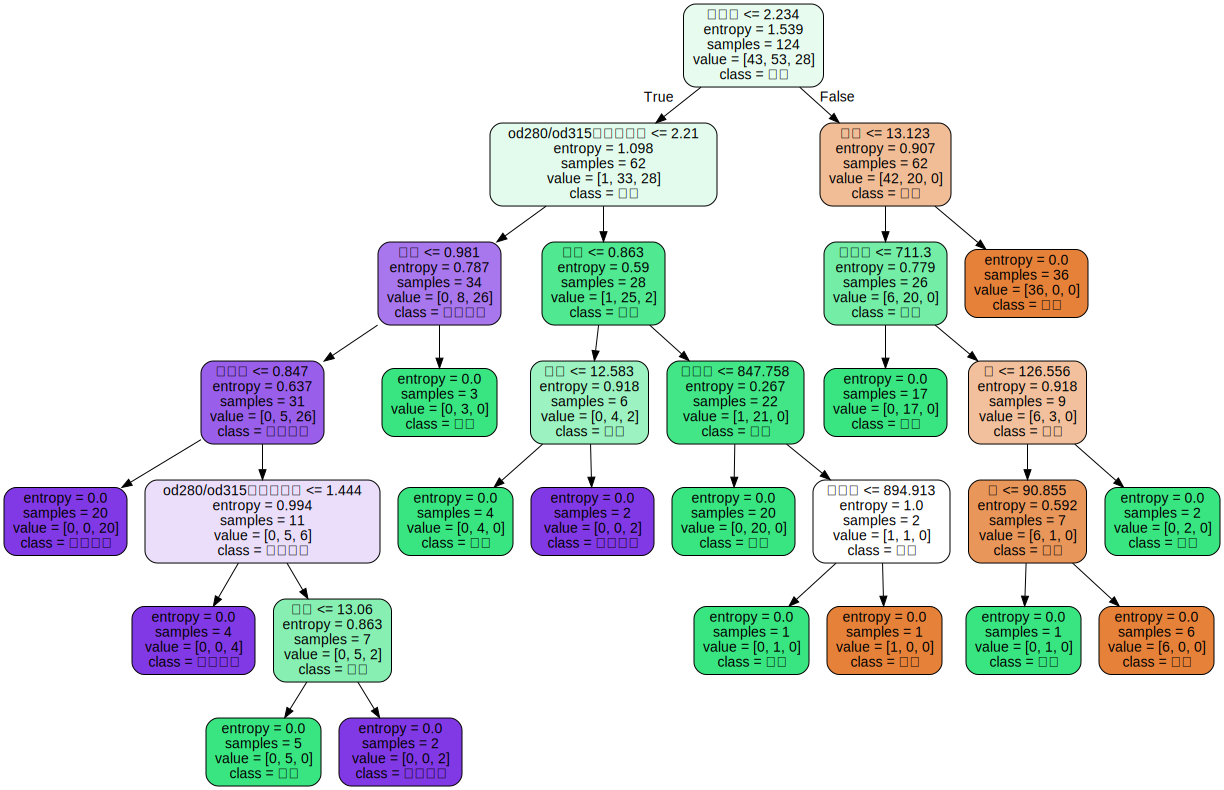

In [24]:
# 5 画出一棵树。

feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                               ) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
# 我们已经根据一个参数也就是标准 criterion ：来建立了一棵决策树。
# 但是一般来说决策树对不同的数据不能保证最优，那么sk-learn的方法就是造不同的决策树。

# 第二个参数。 random_state.

# 然后sklearn根据不同的决策树来选择最优的树。

# clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
# clf = clf.fit(Xtrain,Ytrian)
# score = clf.score(Xtest,Ytest)

## random_state & spliter

 random_state 让树构建的时候更加随机，当然这中随机是建立在数据集维度够高的前提下。

spliter 有两个参数 best和random ，best，虽然随机，但是还是会考虑更加重要的feature。重要性可以同构feature_importances_来查看。

random ：则就不会考虑feature_importances_




In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30, splitter='random')

clf = clf.fit(Xtrain,Ytrain)

score = clf.score(Xtest,Ytest)

score

0.9444444444444444

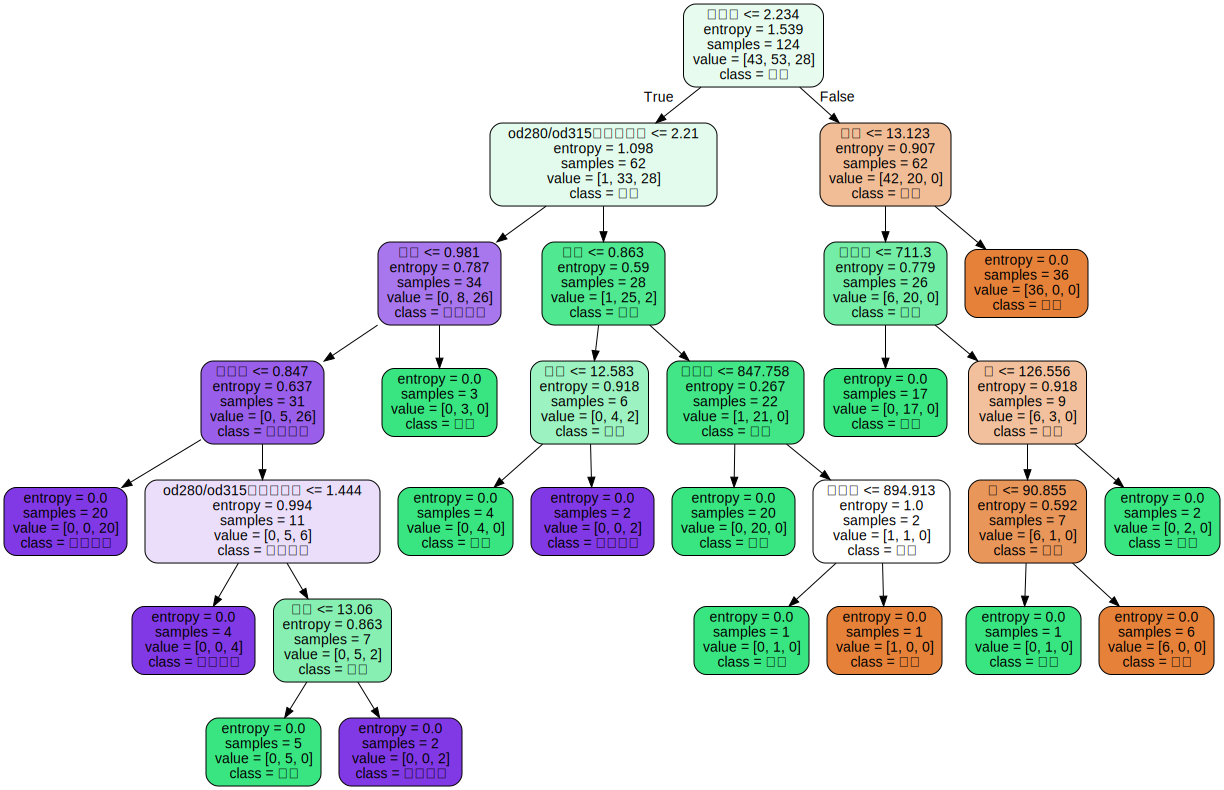

In [25]:
import graphviz
dot_data = tree.export_graphviz(clf,feature_names=feature_name,class_names=['琴酒','雪梨','贝尔莫德'],filled=True,rounded=True)

graph = graphviz.Source(dot_data)
graph

### 2020.8.19日

In [26]:
# 剪枝参数。
# 查看决策树对训练集的逆合程度和测试集的拟合程度。
score_train = clf.score(Xtrain, Ytrain)
print(score_train)
score_test = clf.score(Xtest,Ytest)
print(score_test)

1.0
0.9444444444444444


## 当决策树的训练拟合度远远高于测试拟合度的时候，我们称之为过拟合。
## 过拟合的原因大致是因为决策树生成的时候应用了很多训练集的噪声，使得对未知数据## 拟合程度不是很号。

## 因此需要对其进行减枝操作。


# 正确的减枝是优化决策树的关键。


## sklearn 提供了不同的剪枝策略：

- max-depth
#### 限制决策数的最大深度，超过最大深度的树枝全部剪掉。该方法应用的最多，高纬度，低样本，非常适用。

#### 决策数生长一层，对样本需求增加一倍，所以max-depth可以在这种情况下有效的限制

#### 过拟合。实际使用的时候可以逐步长生深度，查看效果后选择最优。

- min_samples_leaf & min_samples_split.

#### 前者对节点的子节点的要求，后者对节点本身要求。都是表示最小的样本数，否则就不分枝。一般搭配maxt_depth 来使用。 一般来说从5开始，不宜过大也不宜过小。

#### 对于类别不多的分类问题，=1 就是最佳的选择。



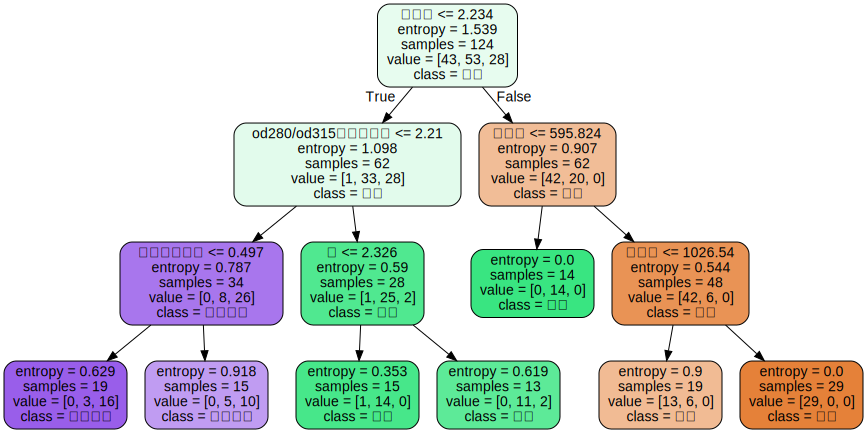

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30, splitter='random', max_depth=3, min_samples_leaf=10, min_samples_split=10)

clf.fit(Xtrain, Ytrain)

class_name = ['琴酒','雪莉','贝尔摩德']
dot_data = tree.export_graphviz(clf, feature_names=feature_name, class_names=class_name, filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

In [28]:
train_score = clf.score(Xtrain,Ytrain)
print(train_score)
test_score = clf.score(Xtest, Ytest)
print(test_score)

0.8629032258064516
0.9629629629629629


## max_features && min_inpurity_decrease

### 配合max_depth 使用，用作精修。

### maxfeatures 强行限制特则会那个个数，超过一定个数，会舍弃。
### min_inpurity_decrease 则是限制不纯度，不纯度小于阈值的会被丢弃。0.19版本新增。

# 确定最优的剪枝参数。

横坐标超参，纵坐标模型表现指标。从图形来决定超参数的选择。

问题：1 剪枝参数一定会提高模型在测试集上的表现吗？  
问题：2 这么多参数，一个个的画曲线吗 ？？？


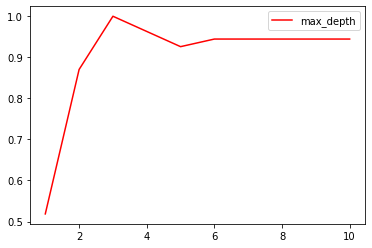

In [31]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
  clf = tree.DecisionTreeClassifier(max_depth=i+1, criterion='entropy', random_state=30, splitter='random')
  clf = clf.fit(Xtrain,Ytrain)
  score = clf.score(Xtest,Ytest)
  test.append(score)

# 画出score曲线。
plt.plot(range(1,11), test, color='r', label='max_depth')
plt.legend()
plt.show()

In [ ]:
# 可以看出，max_depth 在3 的时候最佳。

# 目标权重参数。
# class_weight && min_weight_fraction_leaf

处理样本中分类不均匀的问题，而min_weight_fraction_leaf 确保叶节点包含样权重总和的一部分。

# 重要的属性和接口。

重要的属性： feature_importances_

重要的接口： fit,score,apply,predict.  
apply 输入：测试集，输出：测试样本所在的叶节点的索引。  
predict： 输入测试集， 输出： 测试样本的标签。   


# 注意：所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。
# sklearn不接受任何一维矩阵作为特征矩阵被输入


# 如果一组数据只有一个特征，那么必须用 reshape(-1,1) 来增加维度。

# 如果一组数据，只有一个数据，一个特征，那么用 reshape(1,-1) 来增加维度。

In [32]:
clf.apply(Xtest)

array([22, 22, 28, 16, 26,  6, 28, 28, 28, 28,  6, 16,  4, 22,  9,  4,  8,
       28, 28, 28,  4,  4, 16, 13,  4, 22,  4, 28,  4,  6, 28, 16, 28,  4,
       22, 28, 16, 16,  8, 10, 28,  4,  4, 16,  4,  9, 28,  4, 16, 16, 28,
        4, 28, 16])

In [33]:
clf.predict(Xtest)

array([1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1,
       2, 2, 0, 2, 1, 1, 0, 2, 0, 1])

In [35]:
clf.predict_proba(Xtest)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

# 八个参数：Criterion，两个随机性相关的参数（random_state，splitter），五个剪枝 参数（max_depth,min_samples_split，min_samples_leaf，max_feature, min_impurity_decrease）
# 一个属性：feature_importances_
# 四个接口：fit，score，apply，predict
# 有了这些知识，基本上分类树的使用大家都能够掌握了，接下来再到实例中去磨练就好。

# DecisionTreeRegressor



```
class  sklearn.tree.DecisionTreeRegressor   
(criterion=’mse’,   
splitter=’best’,   
max_depth=None,   
min_samples_split=2,   
min_samples_leaf=1,   
min_weight_fraction_leaf=0.0,   
max_features=None,    
random_state=None,          
max_leaf_nodes=None,          
min_impurity_decrease=0.0,      
min_impurity_split=None,        
presort=False)      
```

# 重要参数
## criterion : 衡量分支质量的指标，支持三种。
###  - mse 均方误差。父节点和子节点之间的均方误差的差额将被用来作为特征选择的标准。这种方法通过使用叶节点的均值来最小化L2 损失。


### - friedman_mse

### - mae : mean absolute error   -------------L1损失。


# 分类树书中我们用准确率score做为模型的衡量指标，在回归树中我们使用 **R**  作为模型衡量指标。

![链接文字](https://img-blog.csdnimg.cn/20200819164715502.png#pic_center)


y^ 是真实标签的平均数。 所以v是总平方和。


虽然mse 总是为正，但是在sklearnz中将其当作一种损失，使用 neg-mean-squared-error.为负。

In [37]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
# 诗词交叉验证cv=10， 并对模型进行打分。

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

# 实例：一维回归的图像绘制。


![链接文字](https://img-blog.csdnimg.cn/20200819170226476.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)


In [38]:
# 1. 导入需要的库。

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [44]:
# 2. 创建一条含有噪声的正选曲线。
rng = np.random.RandomState(1)
x = np.sort(5*rng.rand(80,1), axis=0) # 生成八十个数。
y = np.sin(x).ravel()

y[::5] += 3*(0.5 - rng.rand(16))

# 一共八十个数，每隔5个就是16个数。
# 因为决策树不接受一维数据，所以，x需要是 80 1 

# y 是标签，所以需要ravel

x.shape

(80, 1)

In [40]:
# rng = np.random.RandomState(1)

# np.random.random((2,1))

array([[0.79689208],
       [0.01133547]])

In [42]:
# np.random.random((2,1)).ravel()

array([0.98986905, 0.57149401])

In [45]:
# 3. 实例化和训练模型。
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(x,y)
regr_2.fit(x,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
# 增维切片的用法。
l = np.array([1,2,3,4,5])
l.shape

(5,)

In [51]:
l2 = l[:,np.newaxis]

In [52]:
l

array([1, 2, 3, 4, 5])

In [53]:
l2

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [55]:
l3 = l[np.newaxis,:]
l3

array([[1, 2, 3, 4, 5]])

In [56]:
# 测试。
x_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)


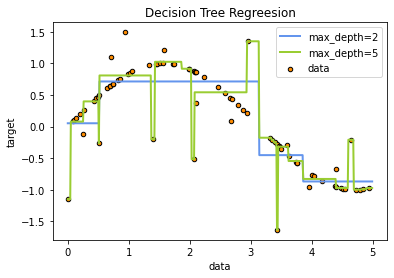

In [57]:
# 4. 绘制图像。

plt.figure()
plt.scatter(x,y, s=20, edgecolors='black', c='darkorange', label='data')
plt.plot(x_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(x_test, y_2, color='yellowgreen', label='max_depth=5', linewidth=2)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regreesion')
plt.legend()
plt.show()